In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

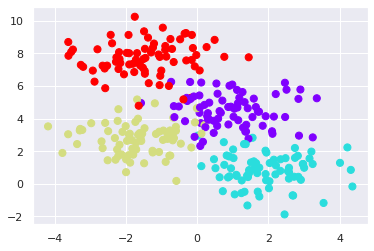

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
tree = DecisionTreeClassifier().fit(X, y)

In [10]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    model.fit(X, y)
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5,
                          cmap=cmap, clim=(y.min(), y.max()),
                          zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

/tmp/ipykernel_18139/1182069963.py:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5,


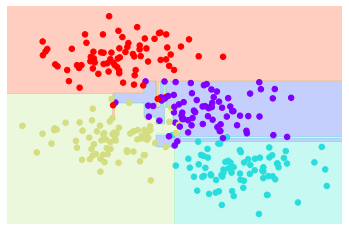

In [11]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [12]:
from sklearn.ensemble import BaggingClassifier

In [13]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

In [14]:
bag.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, random_state=1)

/tmp/ipykernel_18139/1182069963.py:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5,


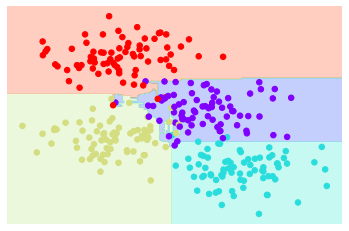

In [15]:
visualize_classifier(bag, X, y)